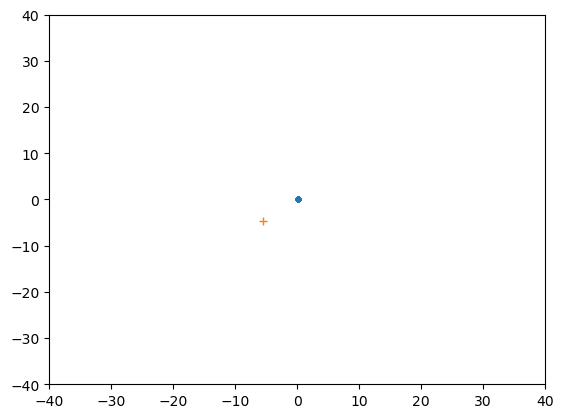

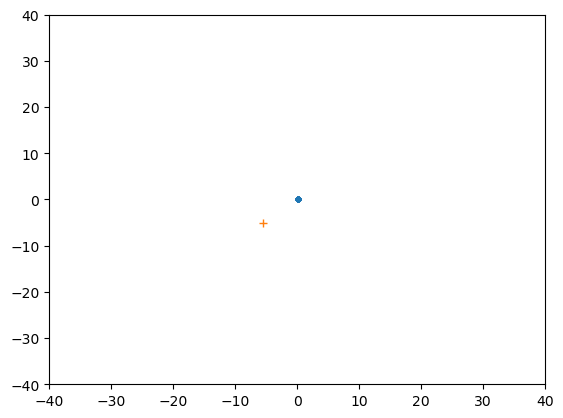

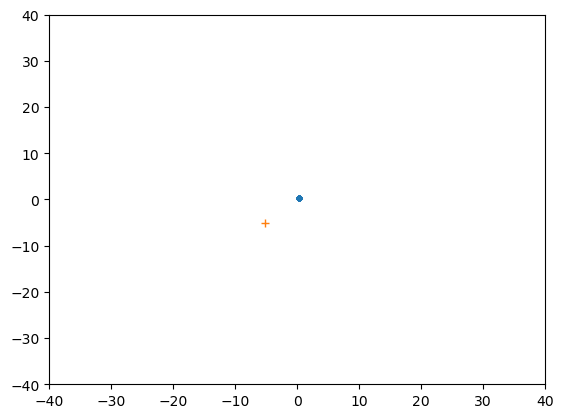

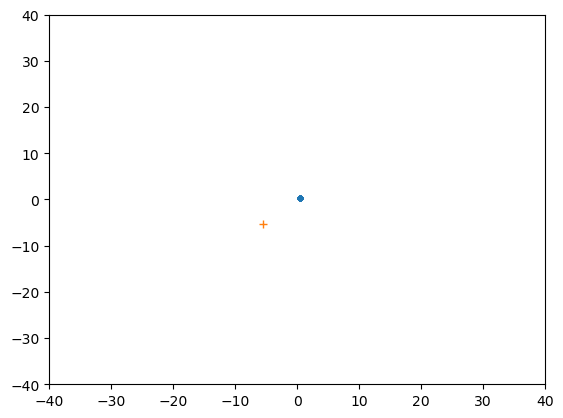

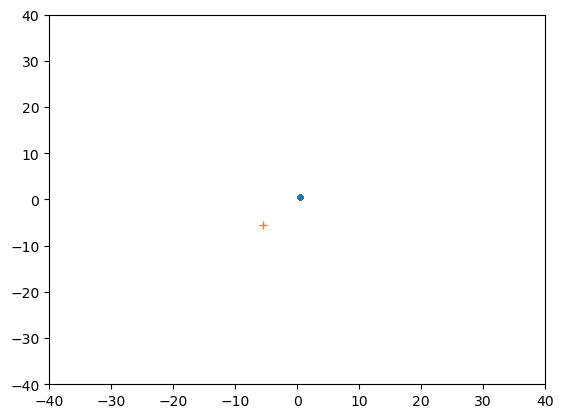

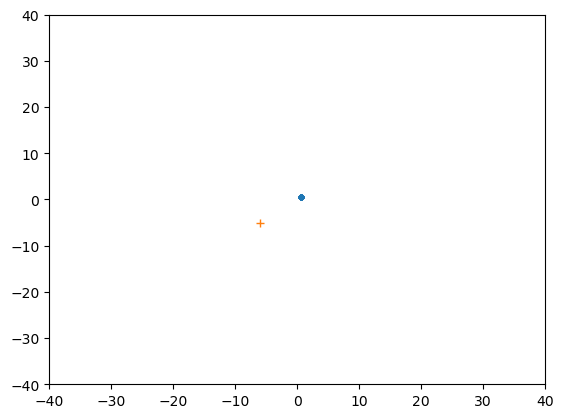

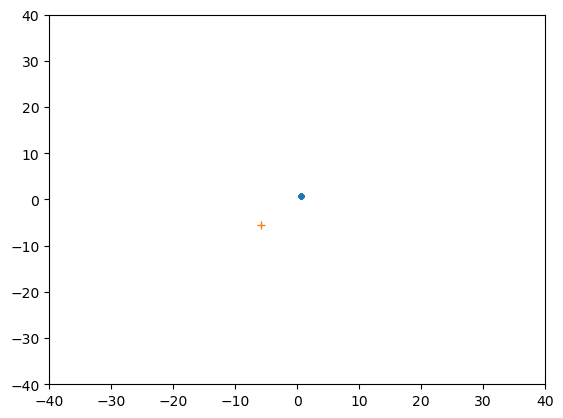

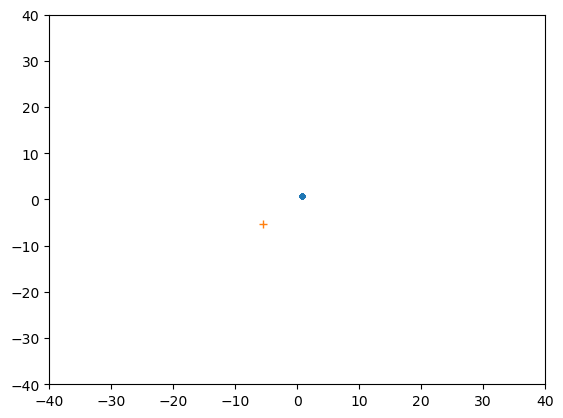

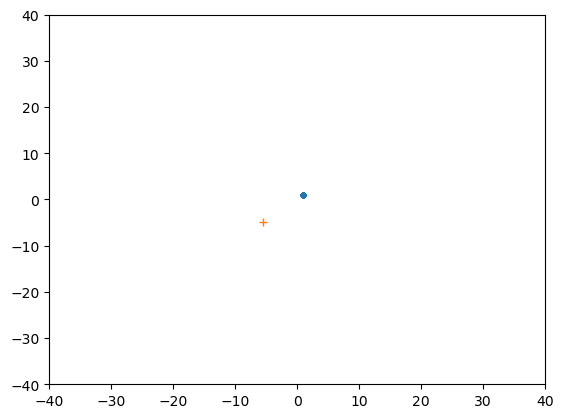

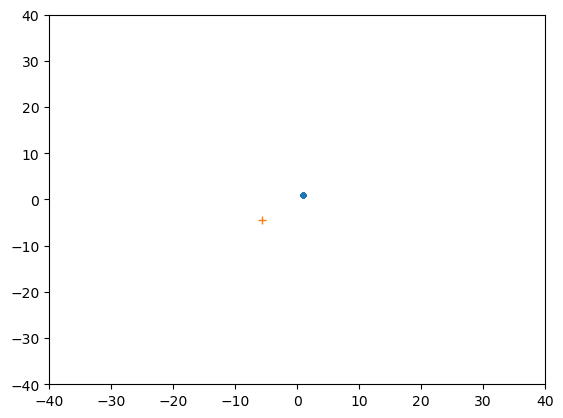

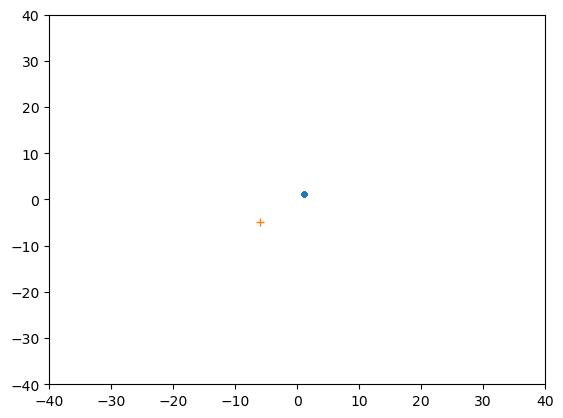

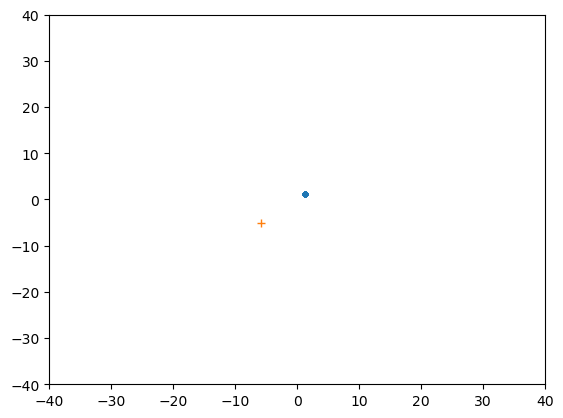

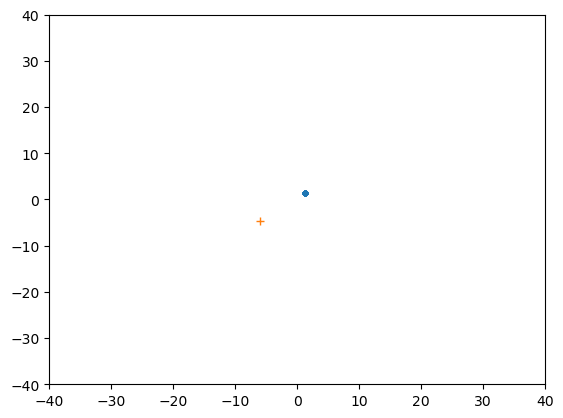

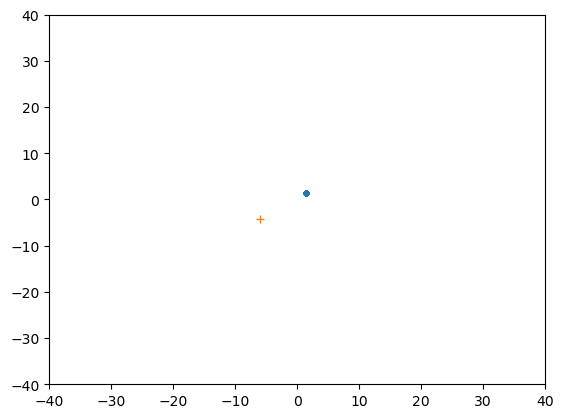

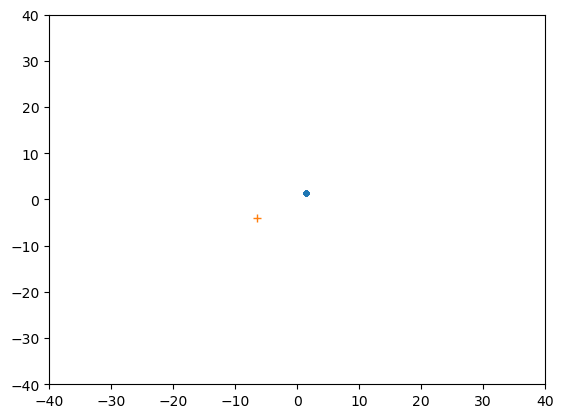

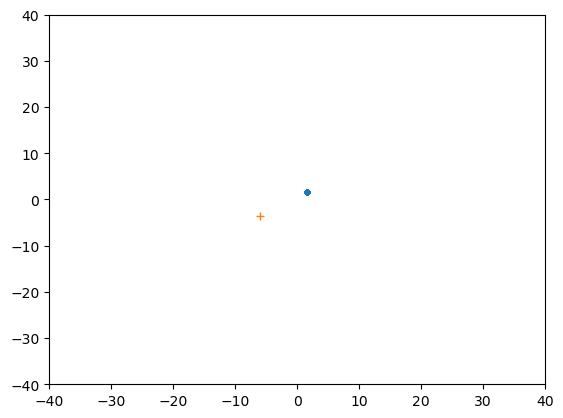

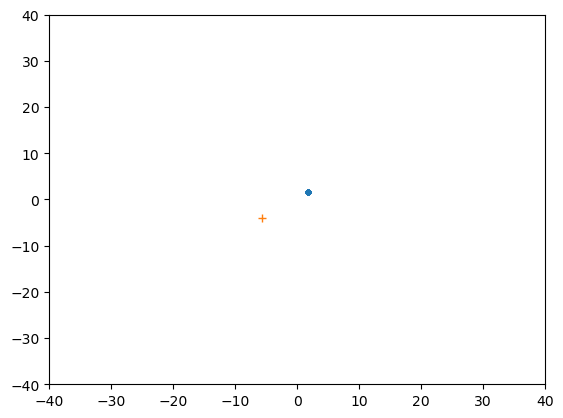

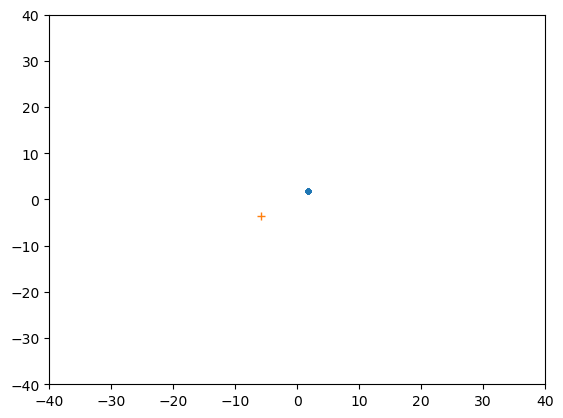

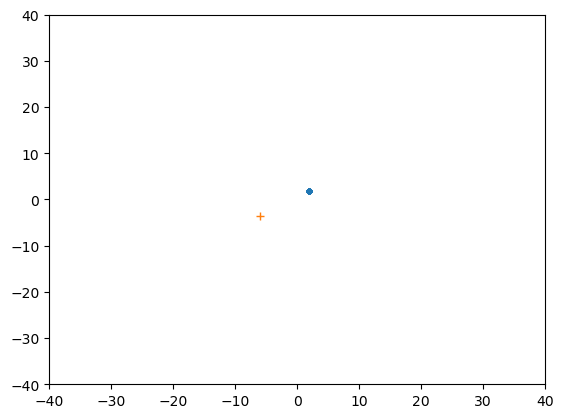

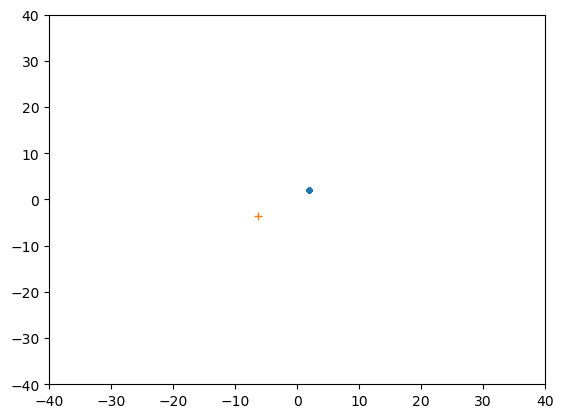

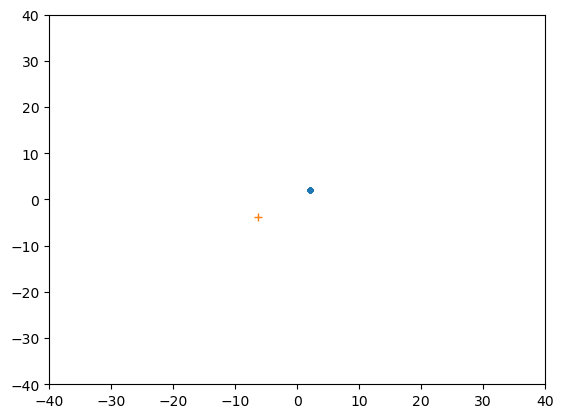

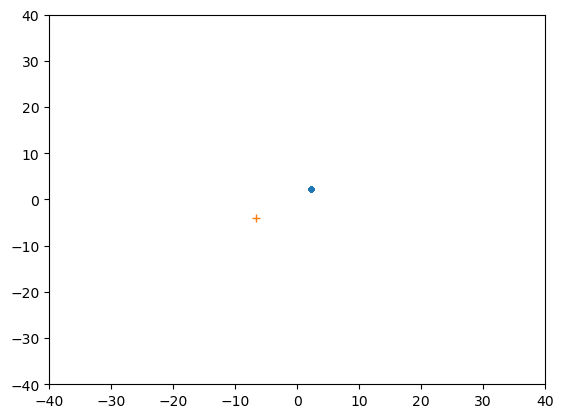

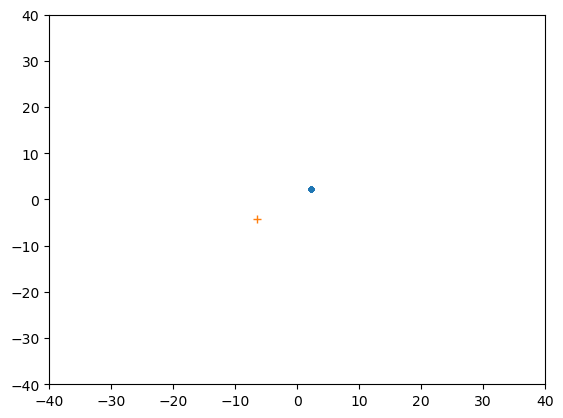

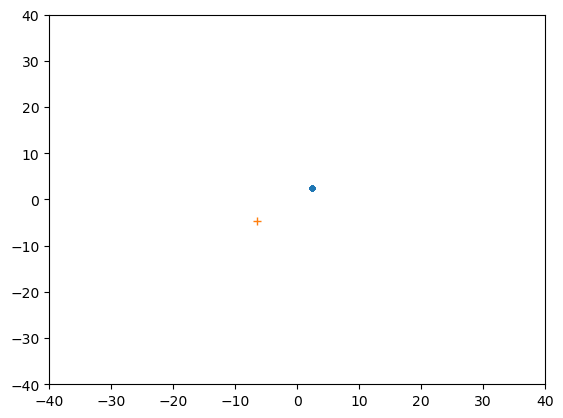

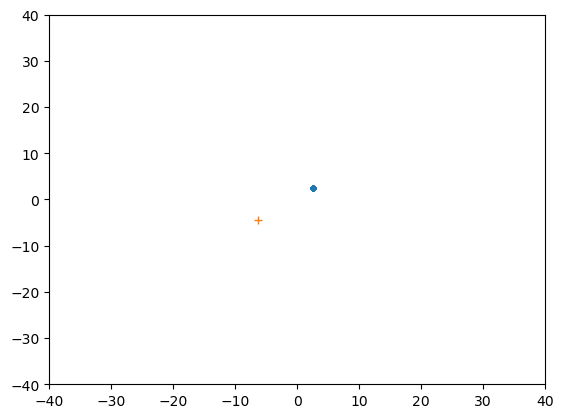

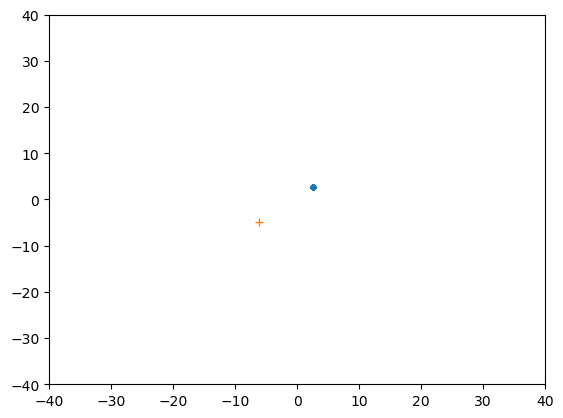

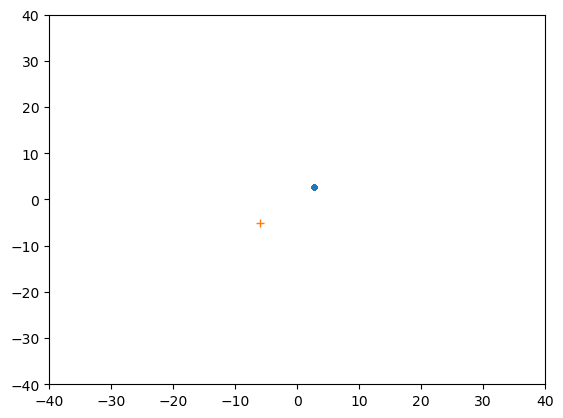

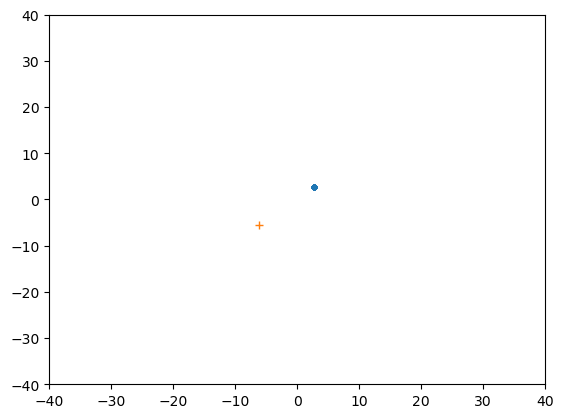

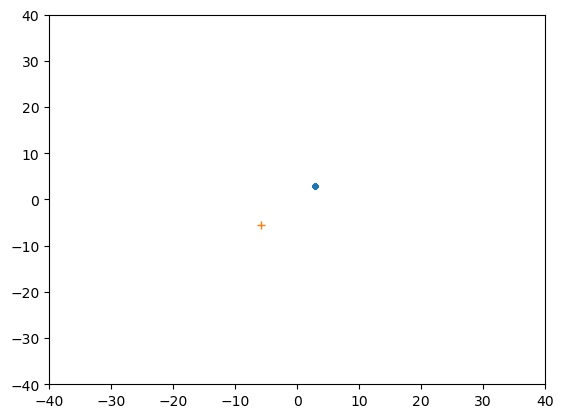

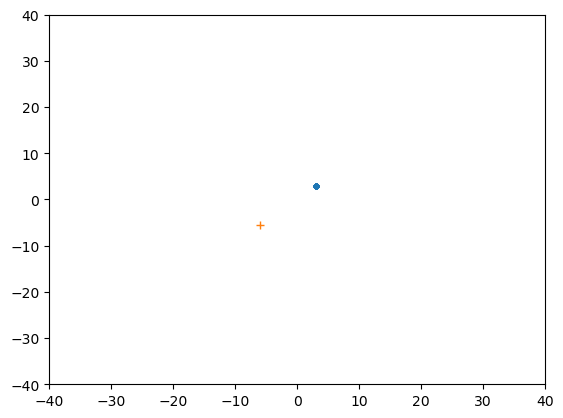

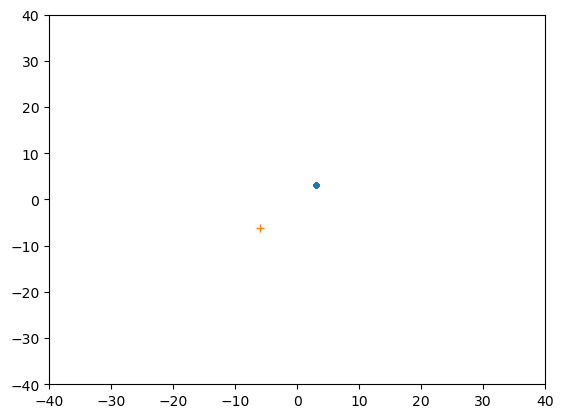

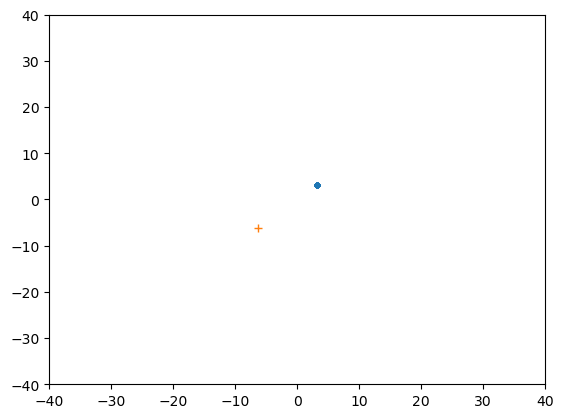

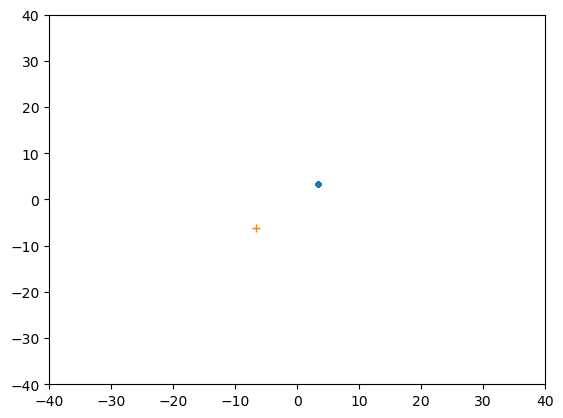

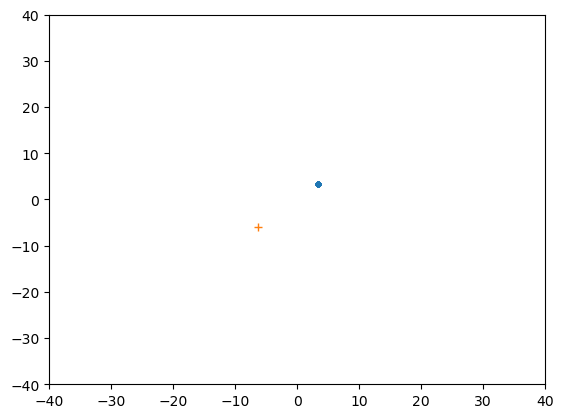

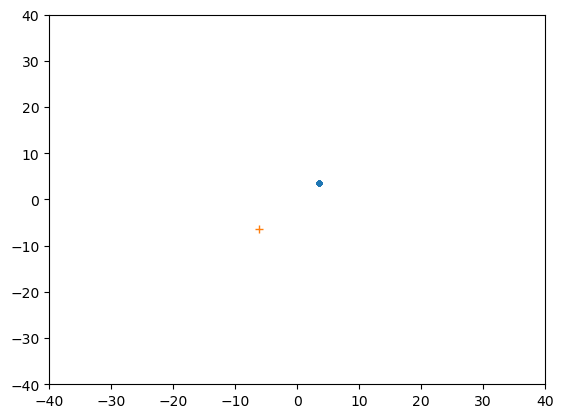

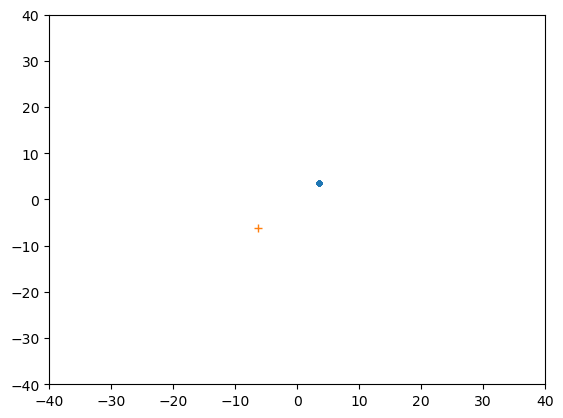

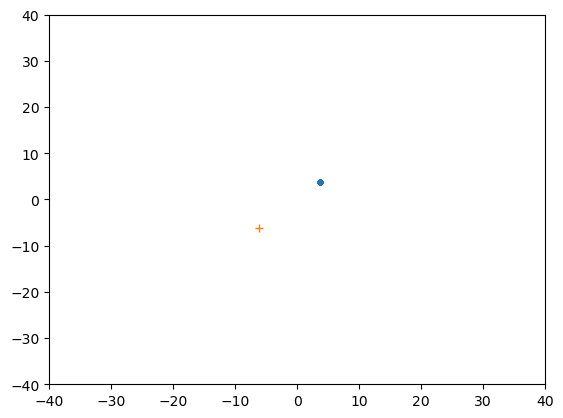

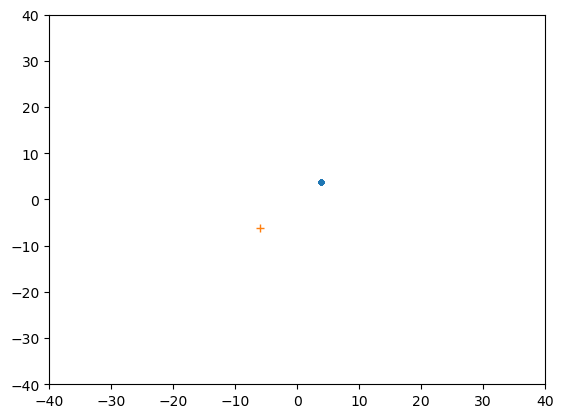

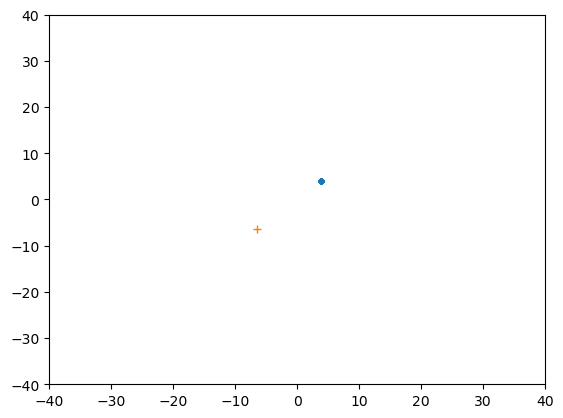

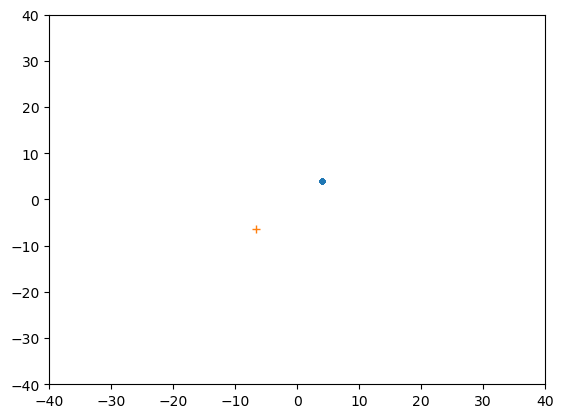

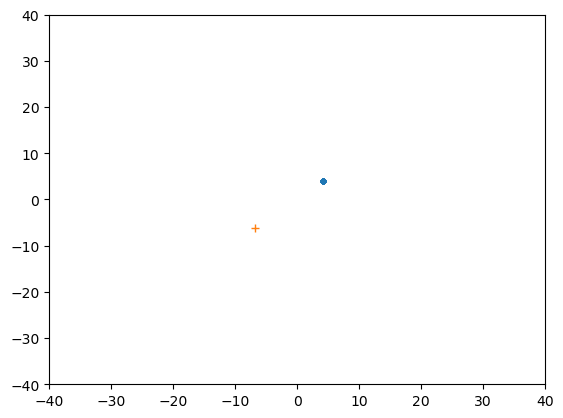

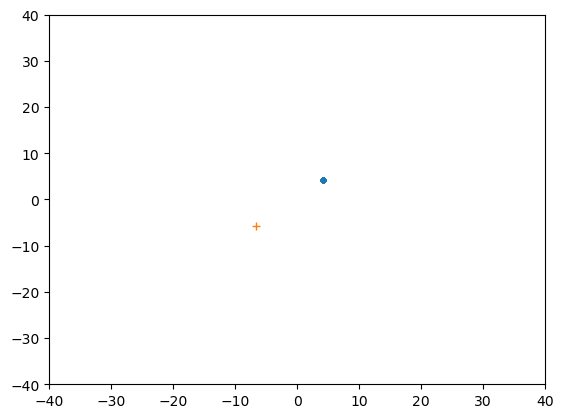

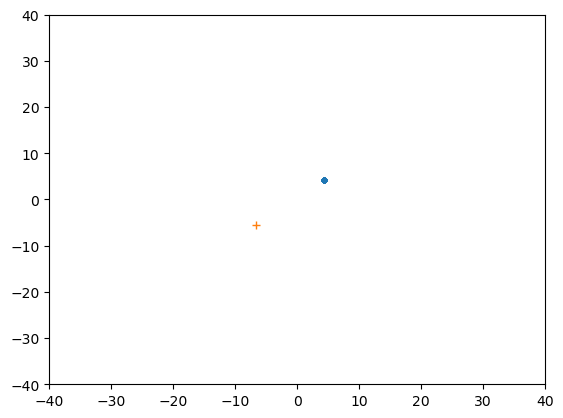

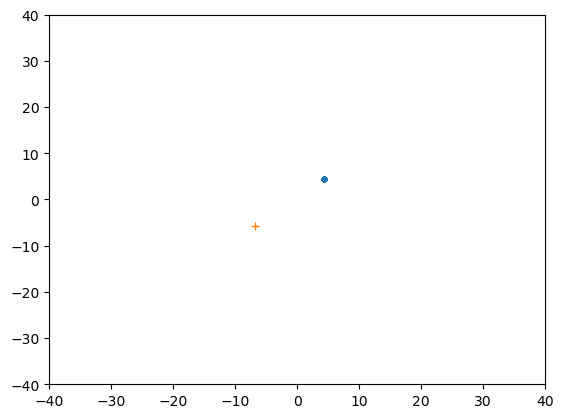

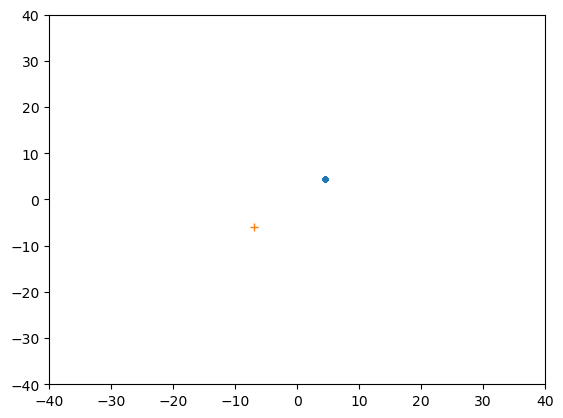

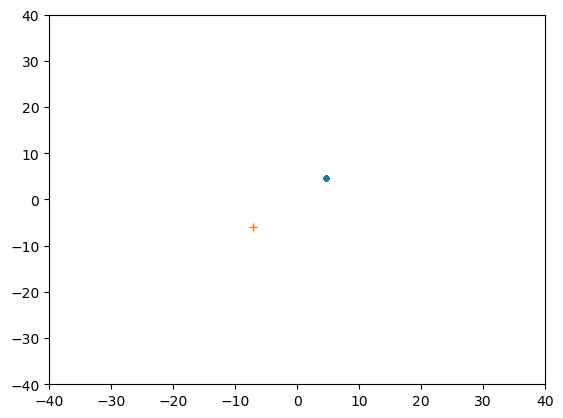

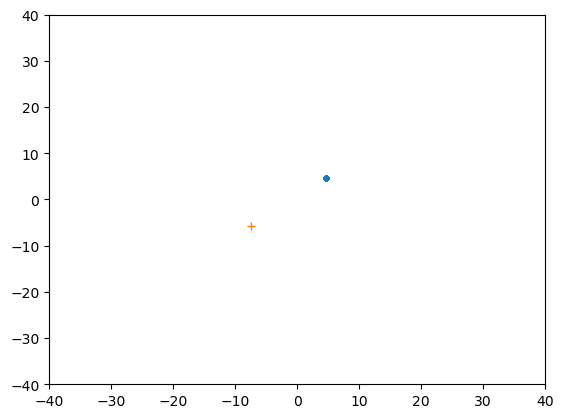

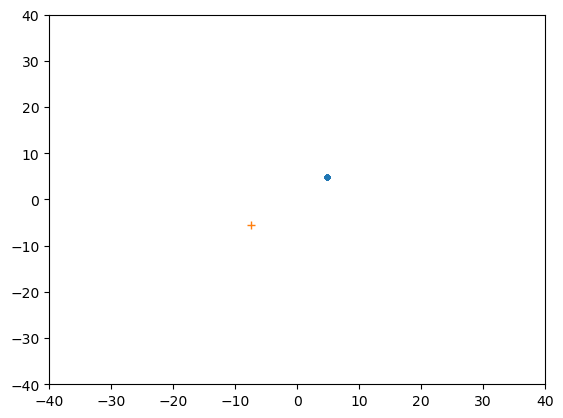

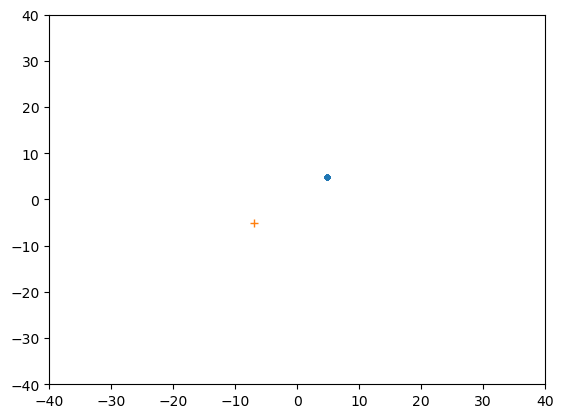

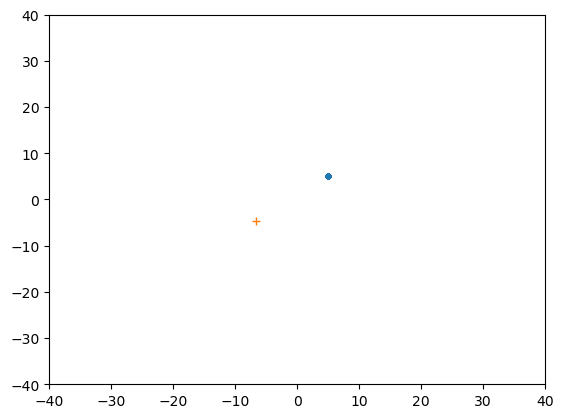

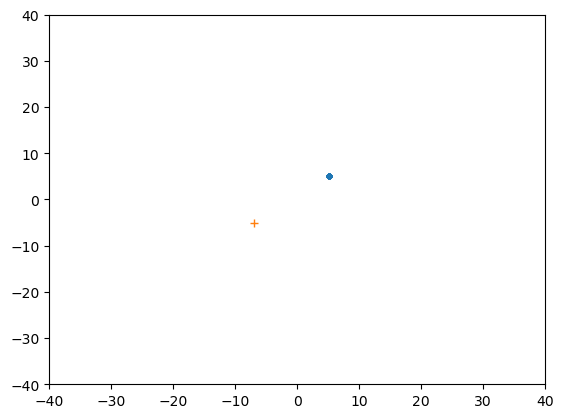

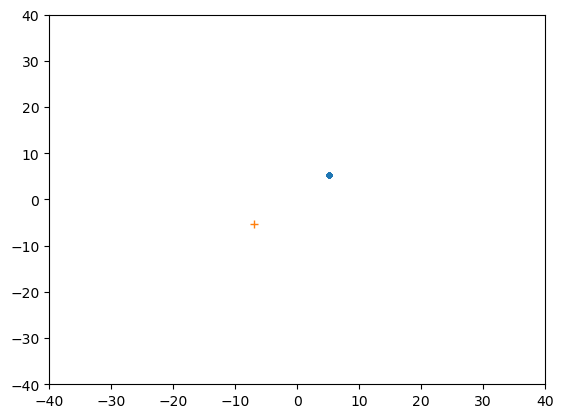

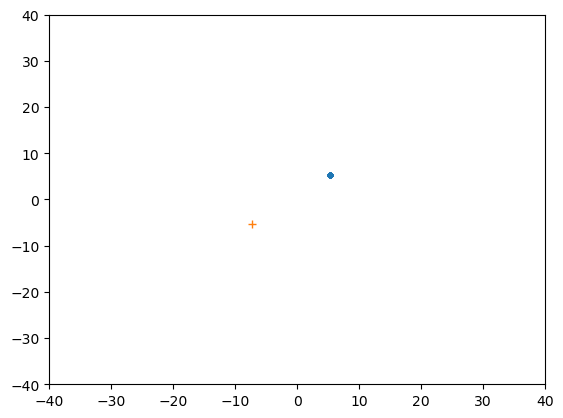

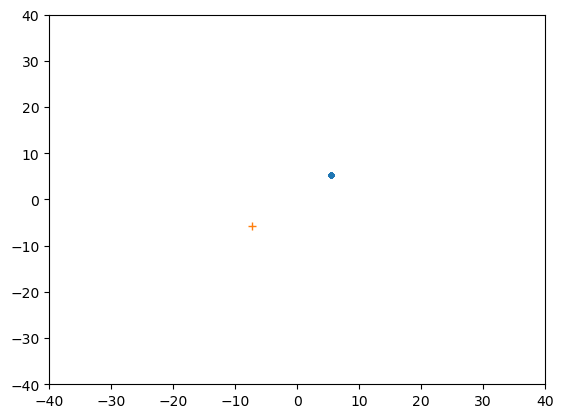

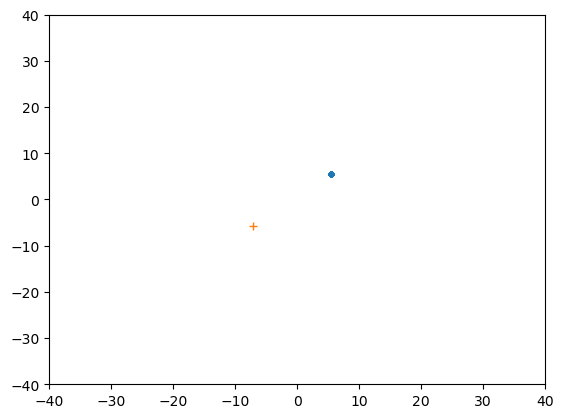

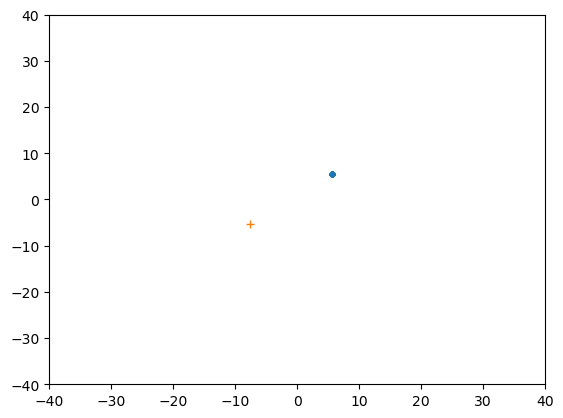

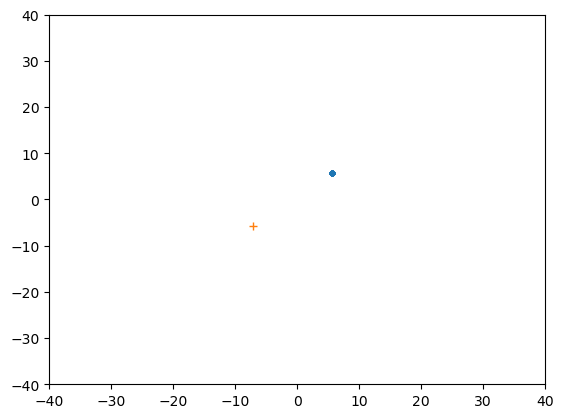

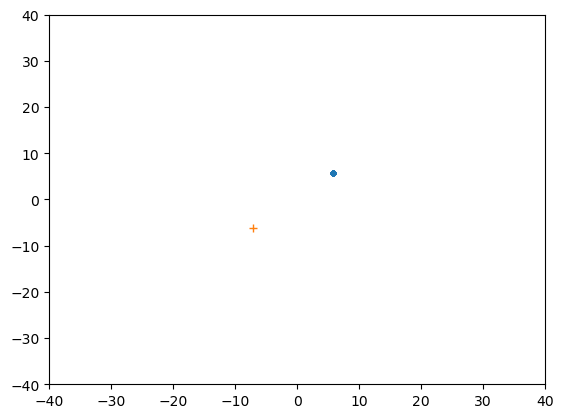

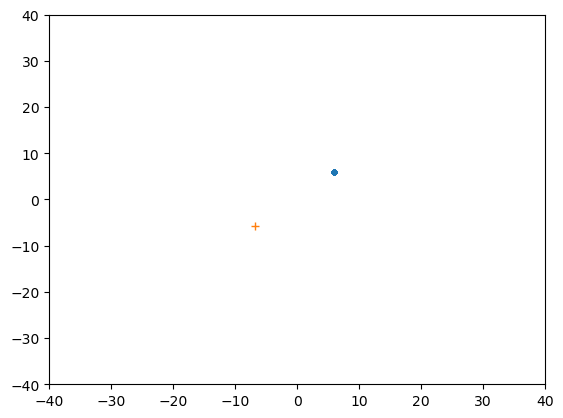

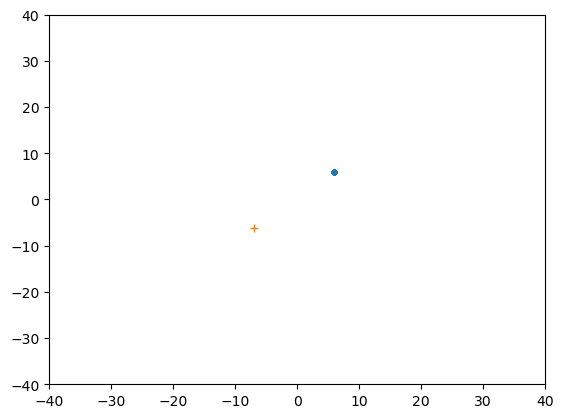

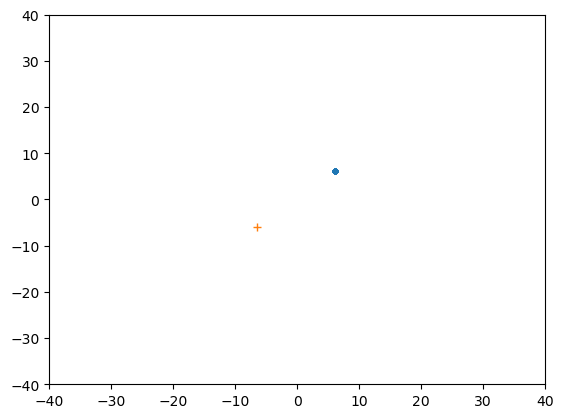

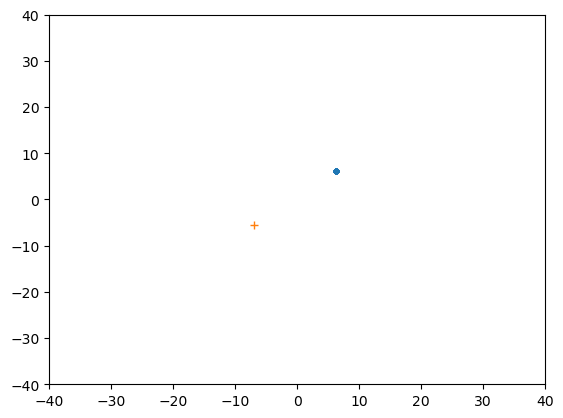

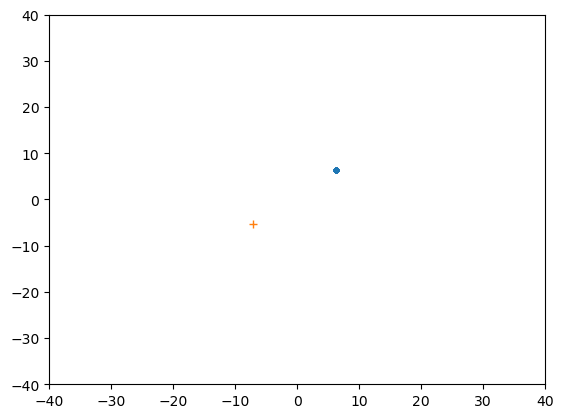

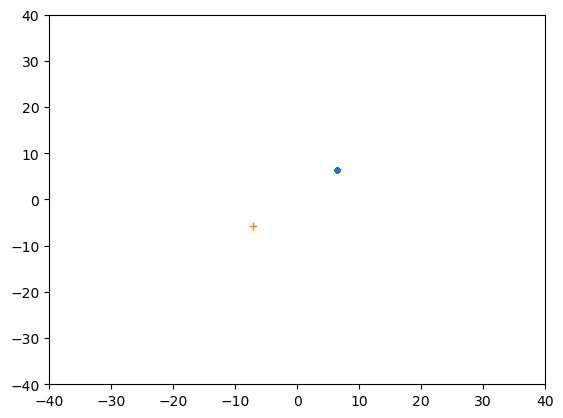

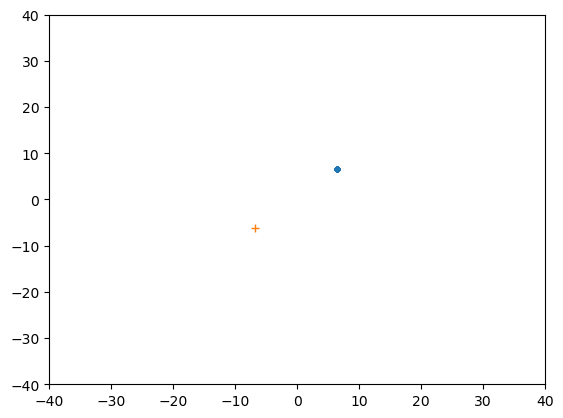

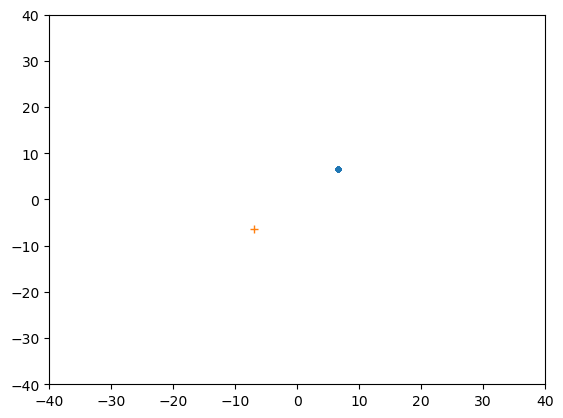

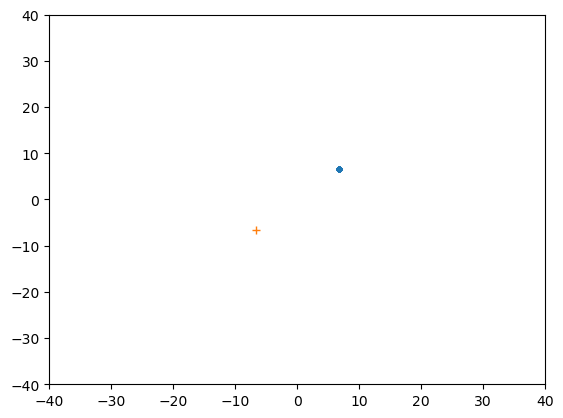

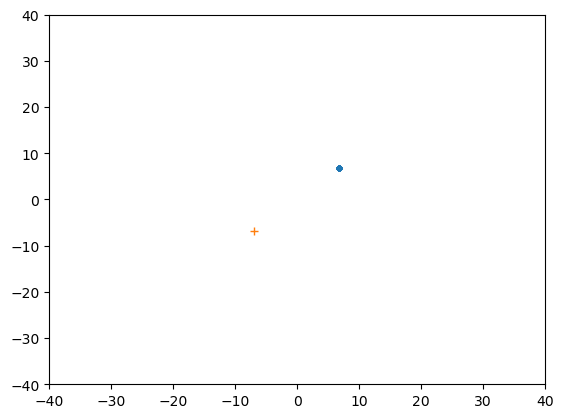

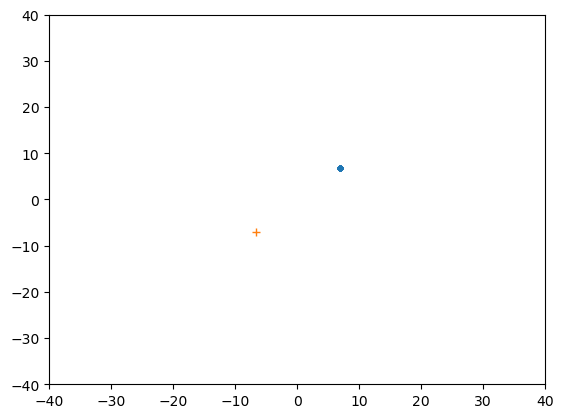

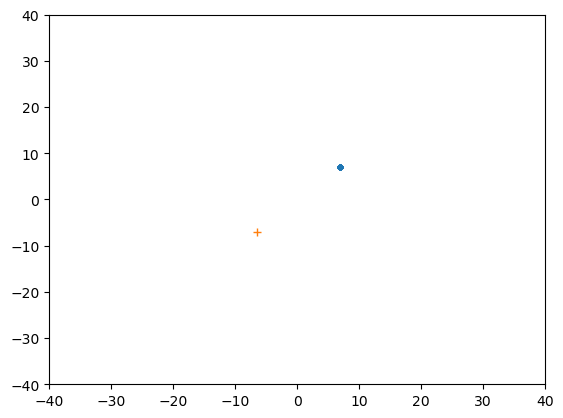

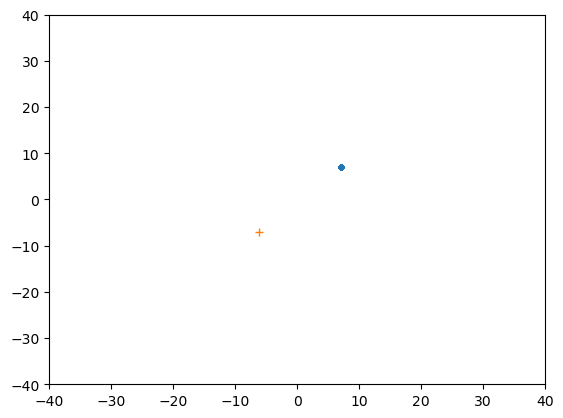

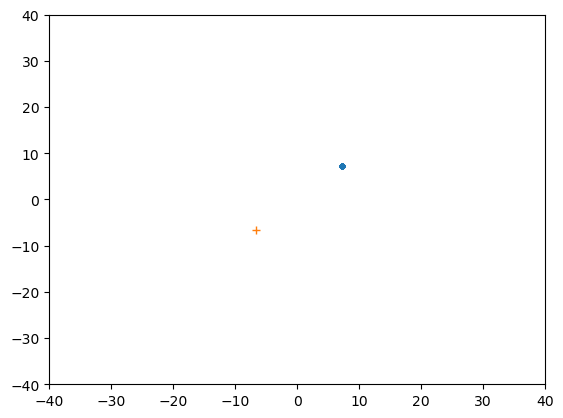

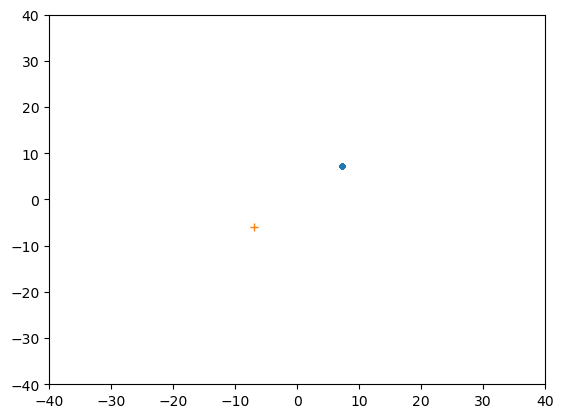

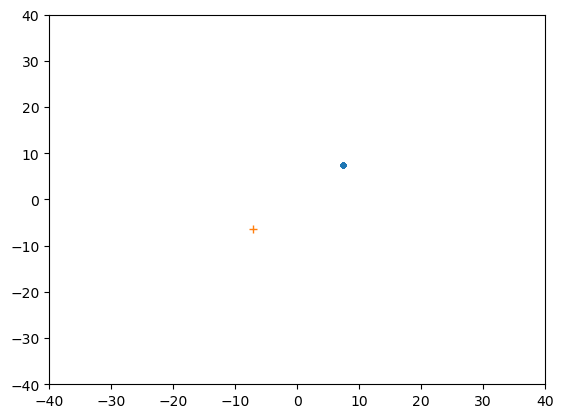

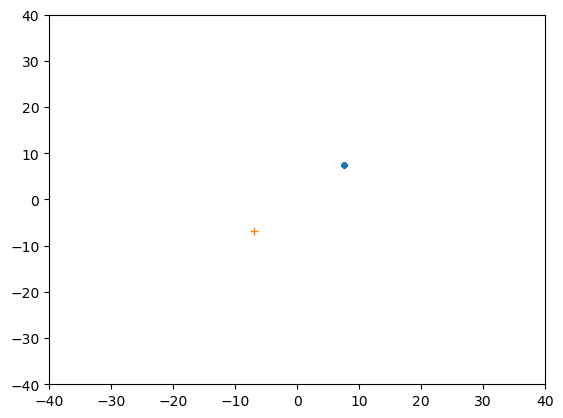

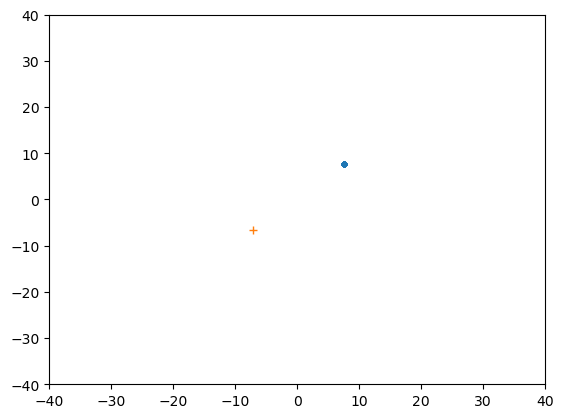

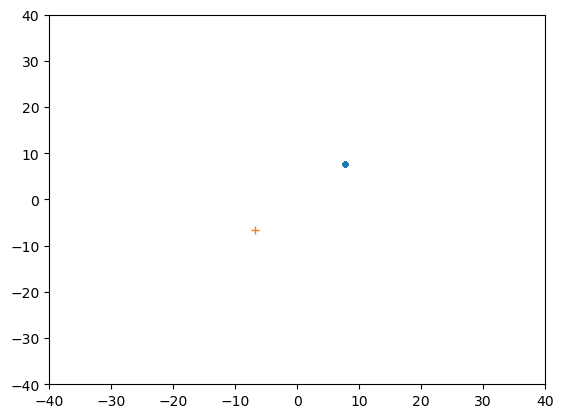

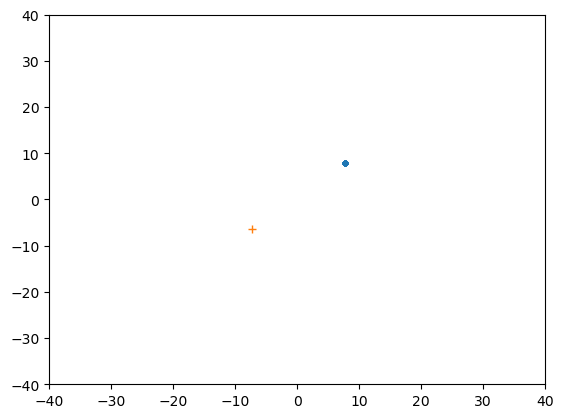

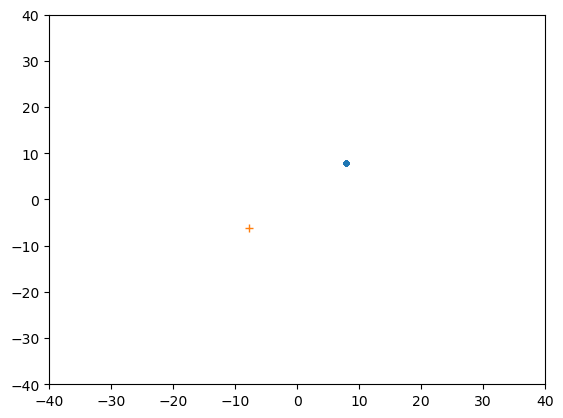

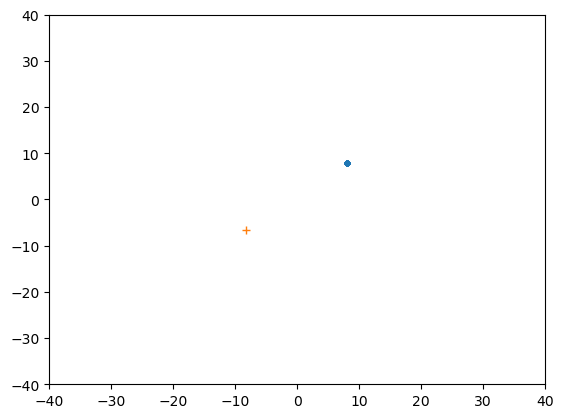

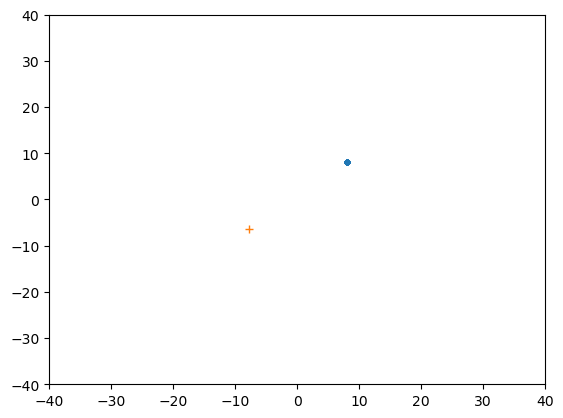

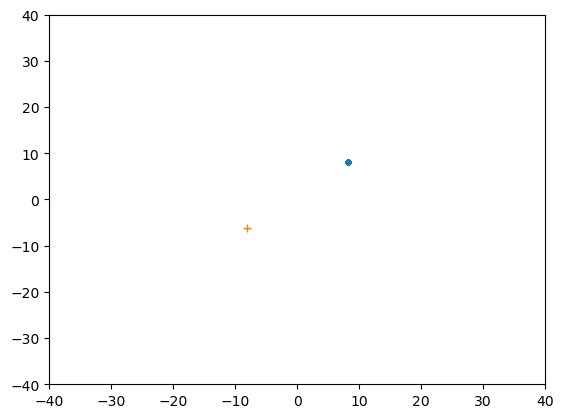

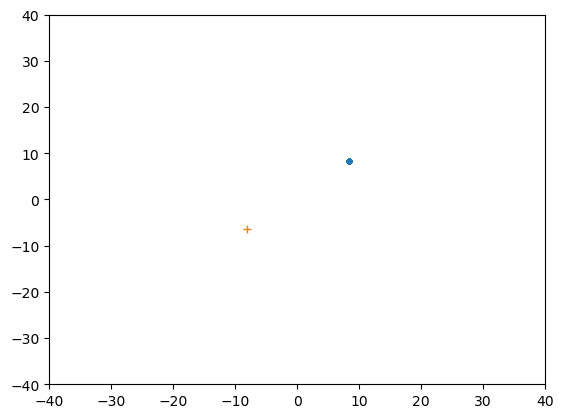

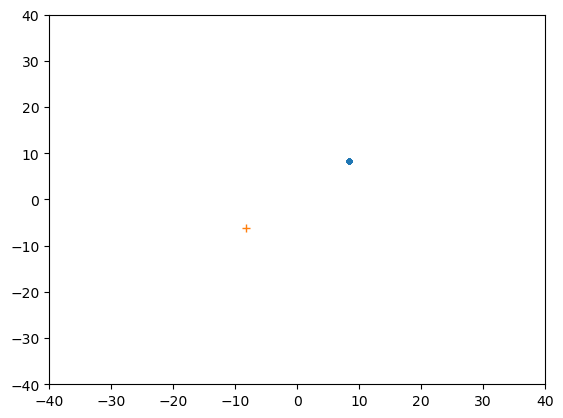

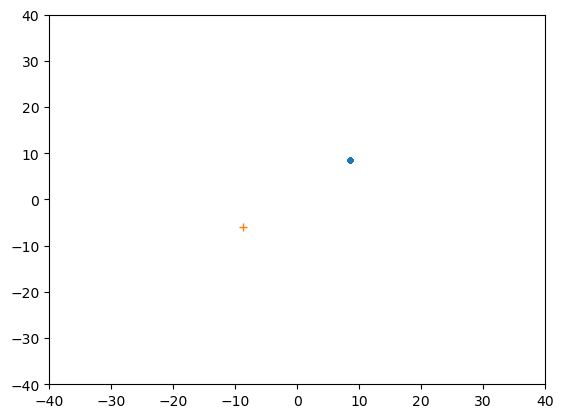

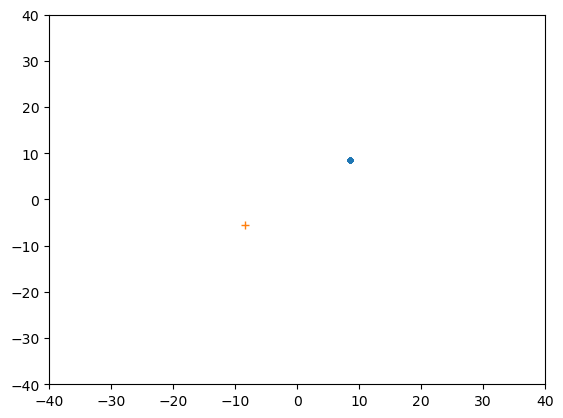

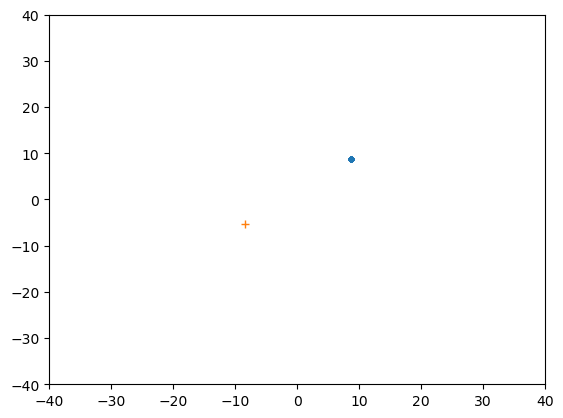

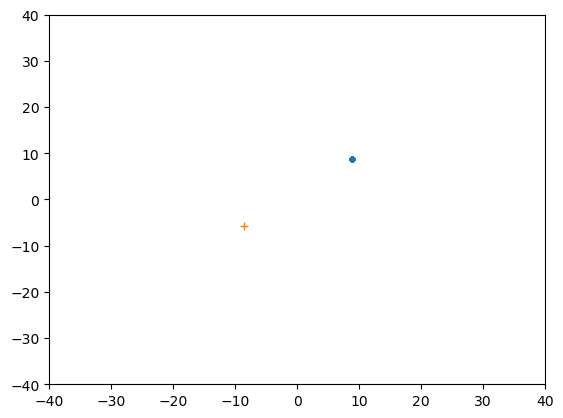

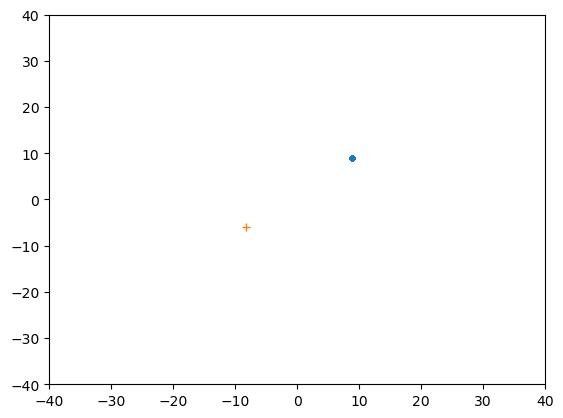

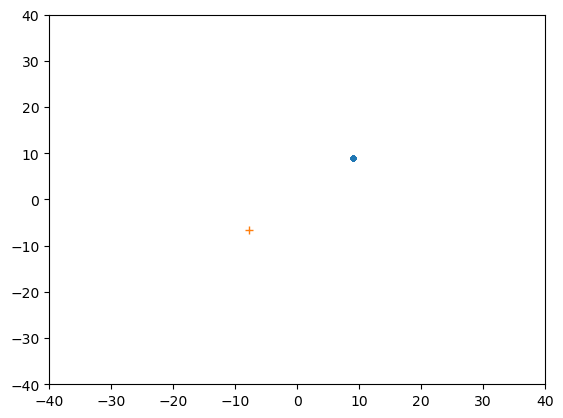

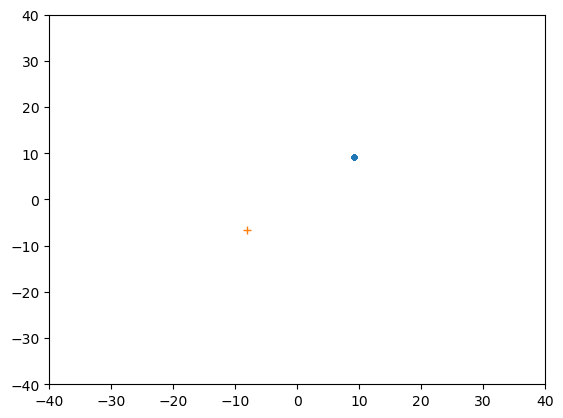

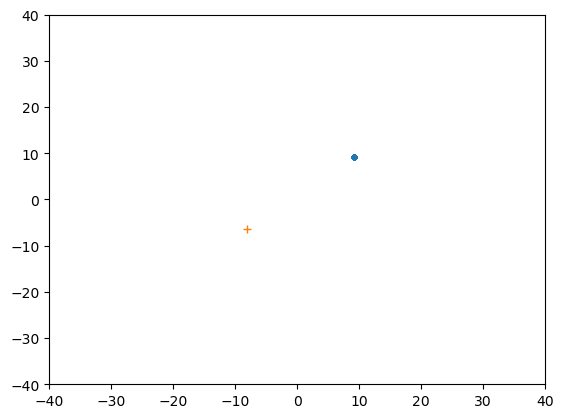

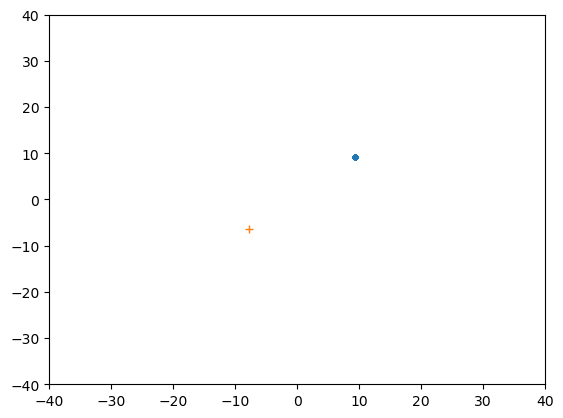

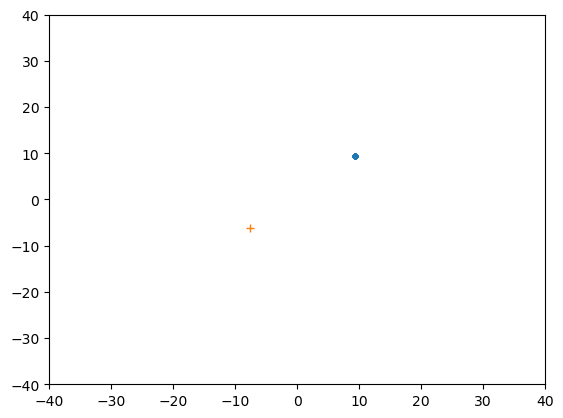

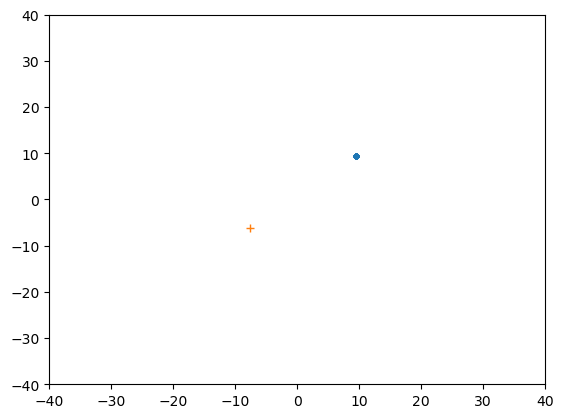

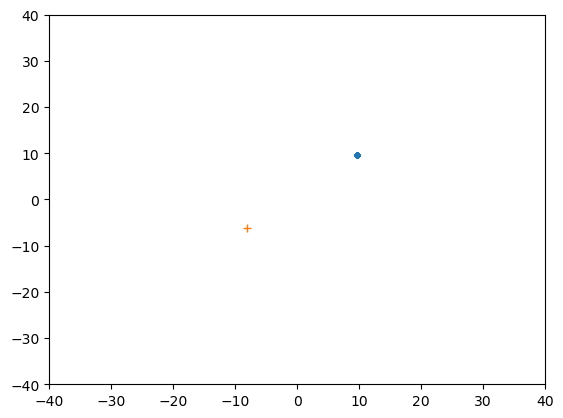

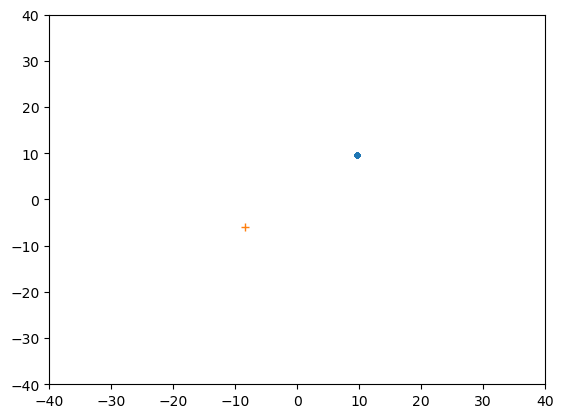

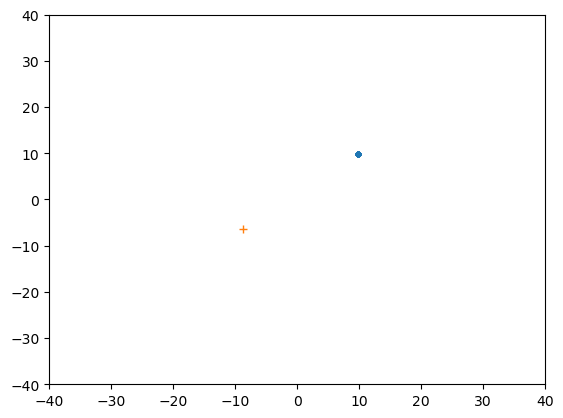

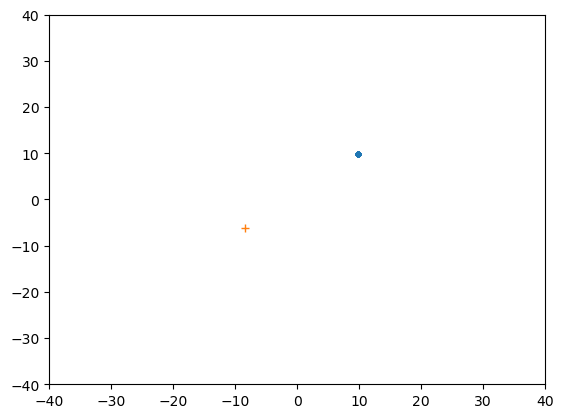

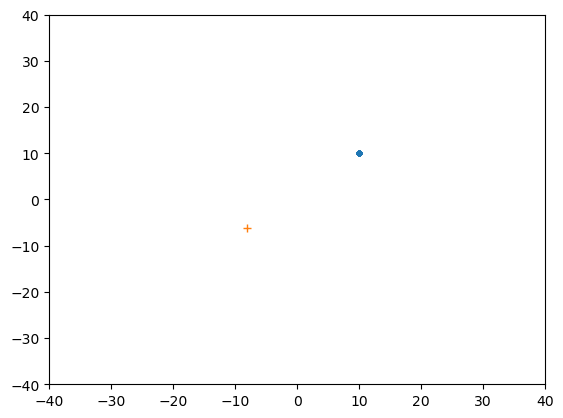

In [8]:
# -*- coding: utf-8 -*-
"""
gsa2.pyプログラム
シンプルなエージェントシミュレーション
2次元平面内で動作するエージェント群
2種類のエージェントが相互作用する
結果をグラフ描画する
使い方　c:\>python gsa2.py
"""
# モジュールのインポート
import random
import numpy as np
import matplotlib.pyplot as plt

# 定数
N = 30           # エージェントの個数
TIMELIMIT = 100  # シミュレーション打ち切り時刻
SEED = 65535     # 乱数の種
R = 0.1          # 近隣を規定する数値
DX = 0.1         # カテゴリ1のエージェントの速度
DY = 0.1         # カテゴリ1のエージェントの速度

# クラス定義
# Agentクラス
class Agent:
    """エージェントを表現するクラスの定義"""
    def __init__(self, cat):  # コンストラクタ
        self.category = cat
        self.x = 0  # x座標の初期値
        self.y = 0  # y座標の初期値
    def calcnext(self):  # 次時刻の状態の計算
        if self.category == 0:
            self.cat0()  # カテゴリ0の計算
        elif self.category == 1:
            self.cat1()  # カテゴリ1の計算
        else:  # 合致するカテゴリがない
            print("ERROR カテゴリがありません\n") 

    def cat0(self):  # カテゴリ1の計算メソッド
        self.x += DX
        self.y += DY

    def cat1(self):  # カテゴリ0の計算メソッド
        self.x += random.random() - 0.5
        self.y += random.random() - 0.5

    def putstate(self):  # 状態の出力
        print(self.category, self.x, self.y)
# agentクラスの定義の終わり

# 下請け関数の定義
# calcn()関数
def calcn(a):
    """次時刻の状態を計算"""
    for i in range(len(a)):
        a[i].calcnext()
        # グラフデータに現在位置を追加
        if a[i].category == 0:
            xlist0.append(a[i].x)
            ylist0.append(a[i].y)
        elif a[i].category == 1:
            xlist1.append(a[i].x)
            ylist1.append(a[i].y)
# calcn()関数の終わり

# メイン実行部
# 初期化
random.seed(SEED)  # 乱数の初期化
# カテゴリ0のエージェントの生成
a = [Agent(0) for i in range(N)]
# カテゴリ1のエージェントの設定
a[0].category = 1
a[0].x = -5 
a[0].y = -5 

# グラフデータの初期化
# カテゴリ0のデータ
xlist0 = []
ylist0 = []
# カテゴリ1のデータ
xlist1 = []
ylist1 = []
# エージェントシミュレーション
for t in range(TIMELIMIT):
    calcn(a)  # 次時刻の状態を計算
    # グラフの表示
    plt.clf()  # グラフ領域のクリア
    plt.axis([-40, 40, -40, 40])   # 描画領域の設定
    plt.plot(xlist0, ylist0, ".")  # カテゴリ0をプロット
    plt.plot(xlist1, ylist1, "+")  # カテゴリ1をプロット
    plt.pause(0.01)
    # 描画データのクリア
    xlist0.clear()
    ylist0.clear() 
    xlist1.clear()
    ylist1.clear() 
plt.show()       
# gsa2.pyの終わり
